In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit

#%matplotlib qt

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
offset =  66
f_carrier = 2241.6e6 + offset
print(f_carrier)

2241600066.0


In [3]:
offset2 =  350
f_carrier2 = 2203.201e6 + offset2
print(f_carrier2)

2203201350.0


In [4]:
data = np.fromfile('/media/scott/fast/ch3_tli/all_2241.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
amp_data = data[:,2]


In [5]:
data2 = np.fromfile('/media/scott/fast/ch3_tli/master_2203.dat', sep = ' ').reshape((-1,4))
t_data2 = Time(data2[:,0], format = 'mjd')
freq_data2 = data2[:,1]
amp_data2 = data2[:,2]


In [6]:
gmd_file = '/media/scott/fast/ch3_tli/JPL_entire.txt'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[0:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_mjd = gmd_mjd - 2400000.5
gmd_rangerate = np.array(gmd_rangerate)

#NOTE: 2022-12-09 - Found that this piece of code was set to scale = 'tai'! Changing this to 'utc' fixed the parobolic curve shape of the residuals and flattened them out.  I believe GMAT outputs TAI and Horizons UTC.
t_gmd = Time(gmd_mjd , scale = 'utc', format = 'mjd')

In [7]:
f_gmat = f_carrier * (1 - 1e3*gmd_rangerate/c)

rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)



In [8]:
f_gmat2 = f_carrier2 * (1 - 1e3*gmd_rangerate/c)

rangerate_interp2 = np.interp(t_data2.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat2 = f_carrier2 * (1 - 1e3*rangerate_interp2/c)



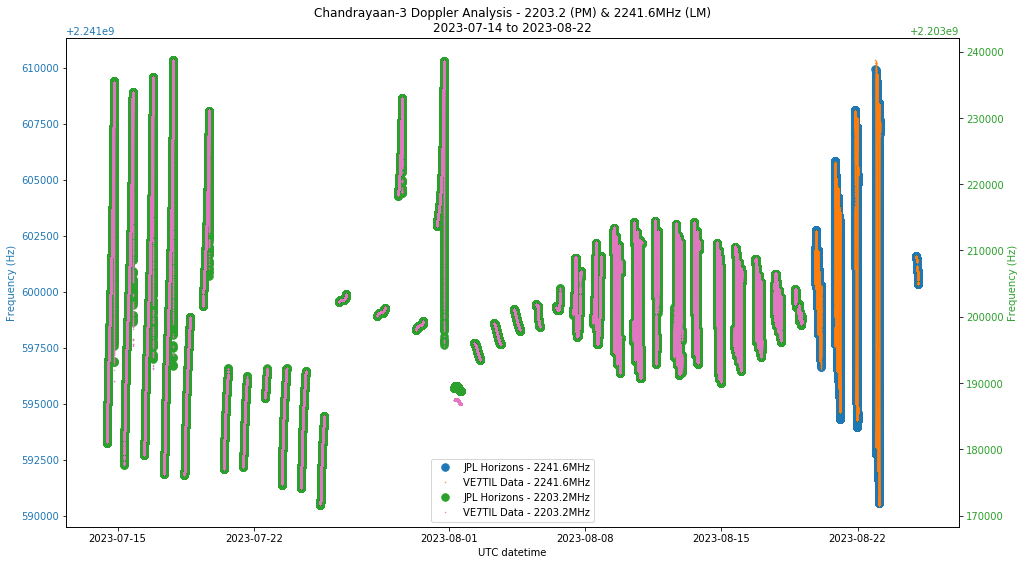

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(t_data.datetime,freq_gmat,'.',markersize=15, color='tab:blue', label='JPL Horizons - 2241.6MHz')
ax1.plot(t_data.datetime, freq_data,'.',markersize=1, color='tab:orange', label='VE7TIL Data - 2241.6MHz')

ax1.set_xlabel('UTC datetime')
ax1.set_ylabel('Frequency (Hz)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(t_data2.datetime,freq_gmat2,'.',markersize=15, color='tab:green', label='JPL Horizons - 2203.2MHz')
ax2.plot(t_data2.datetime, freq_data2,'.',markersize=1, color='tab:pink', label='VE7TIL Data - 2203.2MHz')

ax2.set_ylabel('Frequency (Hz)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower center')
plt.title('Chandrayaan-3 Doppler Analysis - 2203.2 (PM) & 2241.6MHz (LM)\n%s to %s'%(t_data2.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.show()



/home/scott/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


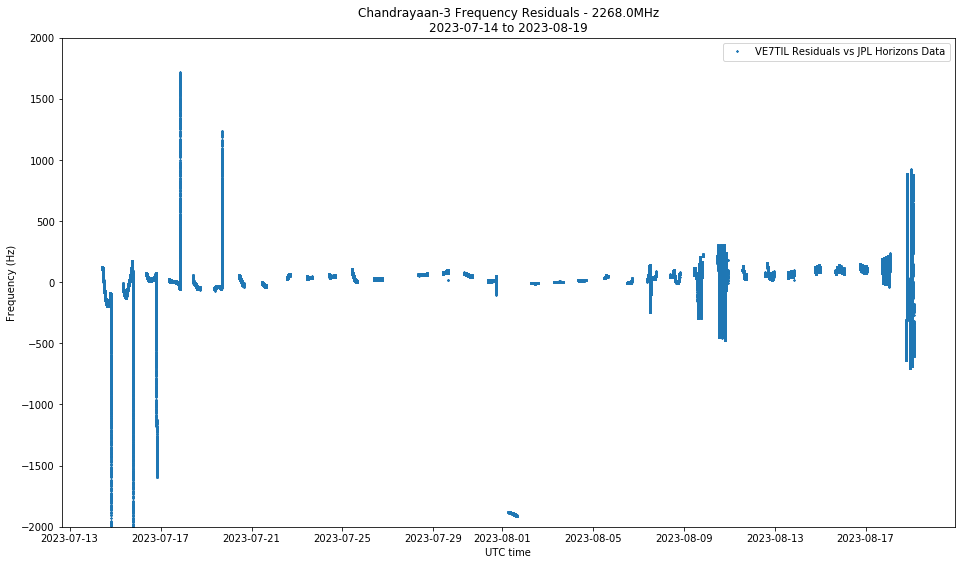

In [10]:
plt.ylim(-2000,2000)
plt.plot(t_data2.datetime, freq_data2 - freq_gmat2,'*',markersize=2,  label = 'VE7TIL Residuals vs JPL Horizons Data')
plt.title('Chandrayaan-3 Frequency Residuals - 2268.0MHz\n%s to %s'%(t_data2.datetime[0].strftime('%Y-%m-%d'), t_data2.datetime[len(freq_data2)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

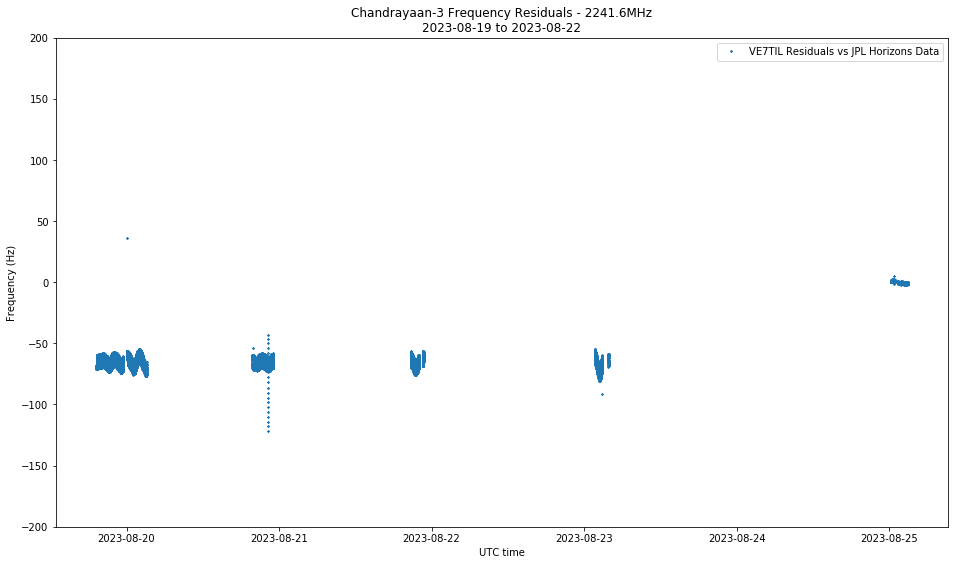

In [11]:
plt.ylim(-200,200)
plt.plot(t_data.datetime, freq_data - freq_gmat,'*',markersize=2,  label = 'VE7TIL Residuals vs JPL Horizons Data')
plt.title('Chandrayaan-3 Frequency Residuals - 2241.6MHz\n%s to %s'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();